In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
from tensorflow.keras.datasets import mnist


In [8]:
val_df = tf.Variable(initial_value = np.random.uniform(size = (2,3)))

In [17]:
val_df.assign_add([[2,3,45],[2,3,45]])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float64, numpy=
array([[ 2.39985296,  3.52187157, 45.69465823],
       [ 2.96374074,  3.91577796, 45.14458331]])>

In [18]:
val_df

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float64, numpy=
array([[ 2.39985296,  3.52187157, 45.69465823],
       [ 2.96374074,  3.91577796, 45.14458331]])>

In [22]:
(train_images, train_labels), _ = mnist.load_data() 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate( [train_images, np.random.random((len(train_images), 784))], axis=1) 
train_images_with_zeros_channels = np.concatenate( [train_images, np.zeros((len(train_images), 784))], axis=1)

In [23]:
from tensorflow.keras import layers

In [25]:
def get_model():
    model = keras.Sequential()
    model.add(layers.Input(shape=(28 * 28 * 2,)))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    
    return model

In [26]:
model  = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.6991 - loss: 1.0675 - val_accuracy: 0.9191 - val_loss: 0.2814
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9167 - loss: 0.2726 - val_accuracy: 0.9303 - val_loss: 0.2396
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9450 - loss: 0.1764 - val_accuracy: 0.9582 - val_loss: 0.1475
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9631 - loss: 0.1193 - val_accuracy: 0.9612 - val_loss: 0.1372
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9725 - loss: 0.0864 - val_accuracy: 0.9433 - val_loss: 0.2001
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9805 - loss: 0.0623 - val_accuracy: 0.9645 - val_loss: 0.1300
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9854 - loss: 0.0451 - val_accuracy: 0.9324 - val_loss: 0.2545
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9892 - loss: 0.0339 - 

In [27]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.8608 - loss: 0.4817 - val_accuracy: 0.9565 - val_loss: 0.1495
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9623 - loss: 0.1269 - val_accuracy: 0.9658 - val_loss: 0.1133
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9769 - loss: 0.0795 - val_accuracy: 0.9752 - val_loss: 0.0871
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9833 - loss: 0.0573 - val_accuracy: 0.9742 - val_loss: 0.0847
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9884 - loss: 0.0402 - val_accuracy: 0.9769 - val_loss: 0.0761
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9913 - loss: 0.0294 - val_accuracy: 0.9771 - val_loss: 0.0782
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9939 - loss: 0.0218 - val_accuracy: 0.9774 - val_loss: 0.0818
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9955 - loss: 0.0182 - 

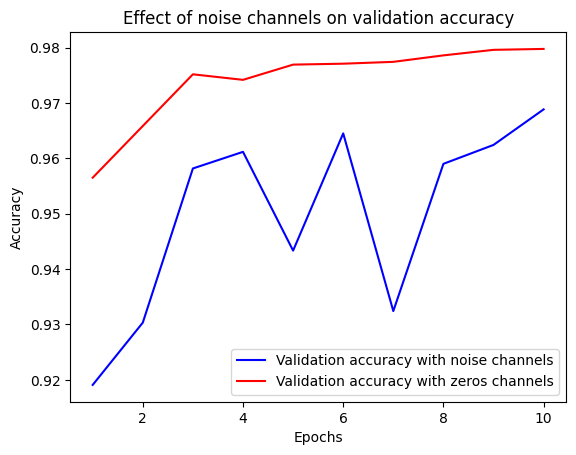

In [29]:
import matplotlib.pyplot as plt 
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"] 
epochs = range(1, 11) 
plt.plot(epochs, val_acc_noise, "b", label="Validation accuracy with noise channels") 
plt.plot(epochs, val_acc_zeros, "r", label="Validation accuracy with zeros channels") 
plt.title("Effect of noise channels on validation accuracy") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy")
plt.legend()
plt.show()